# Session 8: data analysis
- sample project
- twitter data
- more data: mobility

### project lists
- stocks
- online classes and quality
- retail
- crime
  

In [4]:
# import as needed
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import pandas_datareader as pdr

/Users/weileizeng/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [5]:
# Example, use a function to get company data and plot it
#define function:
def yahoo_plot(sample_names,sample_codes):
    # getting data
    n=len(sample_names)
    dfs=[]
    for i in range(n):
        print(sample_names[i])
        dfs.append(pdr.get_data_yahoo(sample_codes[i]))

    #plt.xlim('2020-01-01','2020-07-01')  
    plt.figure(figsize=(12,5))
    for i in range(n):  
        plt.plot(dfs[i][dfs[i].index>'2020-01-01']['Close'],label=sample_names[i])
    #    plt.plot(dfs[i]['Close'])
        #dfs[i].plot(title=sample_names[i],y='Close')
    plt.legend()
    
    

costco
amazon
walmart


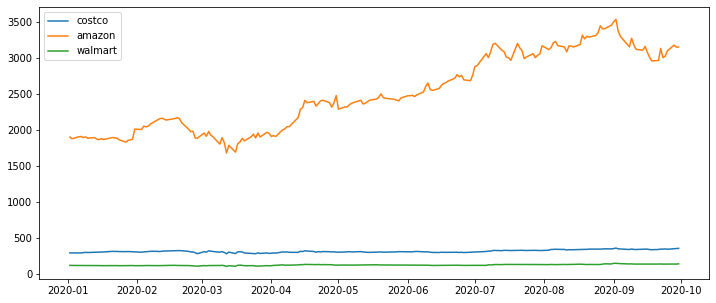

In [8]:
# analyze data of a list of retail companys (or high-tech companies), 
# and see how it responses to COVID

retail_names=['costco','amazon','walmart']
retail_codes=['COST','AMZN','WMT']

high_tech_names = ['facebook','google','tesla','microsoft','twitter']
high_tech_codes = ['FB','GOOG','TSLA','MSFT','TWTR']

high_tech_names = ['facebook','tesla','microsoft','twitter']
high_tech_codes = ['FB','TSLA','MSFT','TWTR']

# online education
education_names =['zoom','mooc','ted','youtube']
education_codes = ['ZM',]

china_high_tech_names=['alibaba','baidu','tencent']
china_high_tech_codes=['BABA','BIDU','TCEHY']

# use a for loop to get all the data
# use a for loop for plot all the data

#sample_names=['alibaba','microsoft','zoom']
#sample_codes=['BABA','MSFT','ZM']

sample_names=retail_names
sample_codes=retail_codes

#sample_names=high_tech_names
#sample_codes=high_tech_codes

yahoo_plot(sample_names,sample_codes)


## twitter data
- source: https://github.com/thepanacealab/covid19_twitter
- the files are downloaded and moved to a single folder
- sample filename: 2020-07-06_top1000bigrams.csv

In [1]:
# read a file and show detail
#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
tw = pd.read_csv('../sample-code/data/covid-term/2020-05-03_top1000terms.csv', header=None,names=['term','frequency'])
print(tw.head(10))

#get entry for ketword 'covid'
a=tw[tw['term']=='covid']
print('a=\n',a)
# For some reason, the frequncy are duplicated for some keywords.
b=a.set_index(pd.Index(range(a.shape[0])))  #reset the index
#the 0th one now give the frequence of the keyword in that day
b.loc[0,'frequency']
print('b=\n',b.loc[0]['frequency'])


NameError: name 'pd' is not defined

In [4]:
# read all files and plot some information
t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
keywords=['covid']
#keywords=['china']

#keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
#keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

df = DataFrame(index=t_range)             #a DataFrame to save selected data
folder='../sample-code/data/covid-term/'  #folder with the data files

#loop through each day
for d in t_range:
    filename=folder + str(d)[:10] + '_top1000terms.csv'
    #print('filename --> ',filename)
    tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
    for key in keywords:
        tw_short=tw[tw['term']==key]
        if tw_short.shape[0]==0:   #check if the key exists or not
            f=0
        else:                      #sometimes there are two duplicates for the entry, not sure why
            tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
            f=tw_short2.loc[0,'frequency']
        df.loc[d,key]=f
    

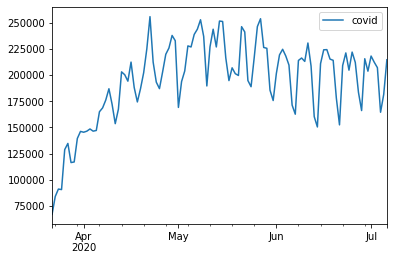

In [5]:
df.plot()

In [6]:
# get average
mean=df.mean()['covid']

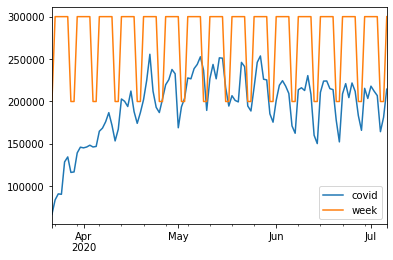

In [17]:
# trying to find the relation between 'covid' tweets and weekends.
# 2020-03-22 is sunday
#weekdays=mean*1.5
#weekends=mean*0.3
weekdays=300000
weekends=200000
flag=8  #1-5 for weekdays, 6-7 for weekends
for d in t_range:
    if ( flag <= 5 ):
        #weekdays
        df.loc[d,'week']=weekdays
    else:
        #weekends
        df.loc[d,'week']=weekends
    flag += 1
    if (flag > 7):
        flag = 1
df.plot()

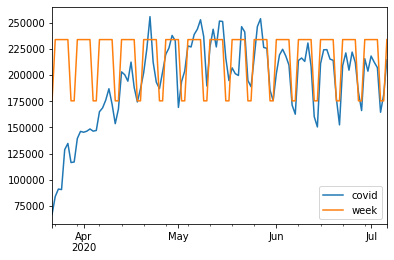

In [17]:
# trying to find the relation between 'covid' tweets and weekends.
# 2020-03-22 is sunday
weekdays=mean*1.2
weekends=mean*0.9
flag=7  #1-5 for weekdays, 6-7 for weekends
for d in t_range:
    if ( flag <= 5 ):
        #weekdays
        df.loc[d,'week']=weekdays
    else:
        #weekends
        df.loc[d,'week']=weekends
    flag += 1
    if (flag > 7):
        flag = 1
df.plot()

In [6]:
df

,trump,google,china,wuhan,virus,doctor,cuomo,week
2020-03-22,17061.0,0.0,10676.0,1684.0,15674.0,2985.0,1032.0,30000.0
2020-03-23,19862.0,0.0,9957.0,1793.0,15364.0,2615.0,0.0,40000.0
2020-03-24,23074.0,0.0,11899.0,2656.0,15762.0,2687.0,1569.0,40000.0
2020-03-25,19520.0,0.0,13407.0,2035.0,14899.0,2412.0,1461.0,40000.0
2020-03-26,28143.0,0.0,25932.0,3451.0,26839.0,3217.0,0.0,40000.0
...,...,...,...,...,...,...,...,...
2020-07-02,34686.0,0.0,9011.0,0.0,21346.0,2381.0,0.0,40000.0
2020-07-03,37523.0,0.0,9747.0,1460.0,22692.0,2585.0,0.0,40000.0
2020-07-04,42682.0,0.0,9315.0,1574.0,20250.0,2075.0,0.0,30000.0
2020-07-05,34663.0,0.0,12407.0,2311.0,22857.0,2258.0,0.0,30000.0


anaylsis: talk about relation between covid tweets and weekday-weekend schedules.

### More to do
- check the frequency with weekdays and weekends
- check degree of anxiety from the keywords, and relate to daily new cases

## mobility
how people were moving while the period of COVID-19

check out this website 
https://www.google.com/covid19/mobility/


## Final project


## Exercise
- Do the sample plot for California cases with weekly patterns
- write analysis for those twitter plots